### Problem 1
Load Boston housing dataset and perform linear regression on it using Linear Least Squares method. Check the performance (MSE) on a selected testing subset.

Don't forget than if our model is $y = a_1\theta_1 + \ldots a_n\theta_n + b$ we need to expand data matrix with additional column of ones to match $n+1$ parameters (including $b$).

Useful function `scipy.linalg.pinv`

In [12]:
%matplotlib inline
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt

import scipy

In [4]:
D = load_boston()

In [8]:
A = D['data']
y = D['target']

In [11]:
# тестовая выборка 450:506
# обучающая выборка 0:450

print(A.shape)
A = np.hstack((A, np.ones((A.shape[0],1))))
print(A.shape)

(506, 13)
(506, 14)


In [13]:
B = A[:450,:].T @ A[:450,:]
z = A[:450,:].T @ y[:450]

theta = scipy.linalg.pinv(B) @ z


In [14]:
print(theta)

[-1.12706397e-01  4.84679322e-02  3.51619982e-02  2.43036682e+00
 -1.71555914e+01  3.92937664e+00  1.05952560e-02 -1.40598405e+00
  3.72316544e-01 -1.54340774e-02 -9.03360601e-01  9.74047349e-03
 -5.51630479e-01  3.42612251e+01]


In [16]:
prediction = A[450:,:] @ theta

MSE = np.sqrt(np.sum((prediction - y[450:])**2))
print(MSE)

25.274338429613728


In [17]:
print(y[:450].min(), y[:450].max(), y[:450].std())

5.0 50.0 9.502334954117693


### Problem 2
Load *digits* dataset, select images corresponding to digits 0 and 1. Set apart random 10% of the data for evaluation. Use Linear Least Squares to train a naive classifier by regressing the pixel values of every digits to it's numerical value:
$$y_i = \sum a_i\theta_i + b$$
where $y_i$ is 0 or 1. Perform classification by thresholding the regressed value. Check the accuracy on the training and testing subsets.

**Make sure to fix random seed for reproducibility.**

In [18]:
from sklearn.datasets import load_digits

In [19]:
D = load_digits()
A = D['data']
B = D['target']
print(A.shape)

(1797, 64)


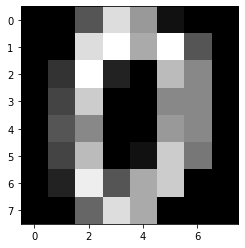

In [28]:
# отобразим одно из изображений, для этого переделаем из матрицы 1х64 в матрицу 8х8
plt.imshow(np.reshape(A[0,:], (8, 8)), cmap='gray')

In [29]:
ids = (B<2)
A = A[ids, :]
y = B[ids]
print(A.shape)

(360, 64)


In [36]:
np.random.seed(0)

test_set = np.random.choice(np.arange(A.shape[0]), int(A.shape[0]*0.1))
train_set = np.setdiff1d(np.arange(A.shape[0]), test_set)
print(train_set)
print(test_set)

[  0   1   2   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  26  27  28  29  30  31  32  33  34  35  36  37
  38  40  41  42  43  44  45  46  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  71  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  89  90  91  92  93  94  95  96  97
  98 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 116 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 166 167 168 169 170 171 173 175
 176 178 179 180 181 182 183 184 185 186 187 188 189 190 191 194 196 198
 199 200 201 202 203 204 205 206 207 208 209 210 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 244 245 246 247 248 249 250 252 253 254 255 256
 257 258 259 260 261 262 263 264 266 267 268 269 27

In [37]:
def LeastSquares(A, y):
    B = A.T @ A
    z = A.T @ y
    
    theta = scipy.linalg.pinv(B) @ z
    return theta

In [38]:
A = np.hstack((A, np.ones((A.shape[0], 1))))
theta = LeastSquares(A[train_set,:], y[train_set])
print(theta)

[ 0.00000000e+00 -1.44461333e-02 -2.57747880e-03  2.42502133e-03
 -5.27458470e-03  1.19208837e-02  2.20187472e-02 -1.49231881e-13
 -3.03635731e-14 -5.41285184e-03  7.14465760e-04 -1.41704923e-03
  3.36976022e-04 -4.29522595e-03 -1.72532281e-02 -6.38425292e-15
  1.55676358e-01  1.11774538e-02 -3.03824575e-03  7.12456401e-03
  3.39012757e-03 -1.67936653e-03  9.37398507e-03  2.23831252e-15
  7.78381788e-02 -6.79676111e-03  2.54759793e-03 -2.47100212e-03
  3.17892743e-02  2.06519055e-03 -7.87056364e-04  2.59939504e-15
  1.93464697e-15 -8.34213790e-04 -9.74887519e-04  8.62172280e-03
 -1.73383517e-03 -4.28732180e-03 -4.79046257e-03 -9.39466265e-16
 -2.89929213e-16 -5.13485529e-03 -8.83037163e-03  6.16566923e-03
  1.53242129e-03 -4.91739633e-03 -4.92289927e-03 -1.61011805e-16
  8.61473165e-16  1.01159453e-03  1.19132714e-03 -1.19564085e-03
 -2.96104087e-03 -1.11906719e-03 -3.73821595e-03  9.12938907e-03
  0.00000000e+00 -6.94156337e-02  1.32033400e-02 -1.40486004e-02
  8.53263766e-04  2.44068

In [39]:
predictions = A[test_set,:] @ theta
print(predictions)

[ 0.02590327  1.15717233  0.9051722   0.90313389  0.97170963  0.950505
  0.10026171  0.07435444  0.97247016 -0.03127274  0.99842277  0.02031194
  0.64762126  0.96767377  1.08965184 -0.03043513  0.87539289  1.10296837
  1.11472402  0.96767377  0.93306305 -0.03043513  0.92817756  1.07638169
  0.04407577 -0.01694469  0.93527428  0.9024468  -0.06055233 -0.07476847
  1.04695363  1.00701375  0.02366645  1.11921639  1.05306896 -0.07476847]


In [41]:
digits = np.zeros(predictions.shape)
digits[predictions > 0.5] = 1

correct = np.sum(digits == y[test_set])/digits.shape
print(correct)

[1.]


### Problem 3
Generate arbitrary nonlinear function on a sample of 10 points from $(0; 10]$, add some Gaussian or discrete noise to the values. Solve Least-Squares problem to fit the data points with polynomial models of various degree. Report RMSE on the obtained models. Plot points vs. model vs. true function. Useful functions: `np.vander`, `np.linspace`, `np.vectorize`

In [81]:
def f(x):
    return 0.1 * np.sin(x) * np.log(x)

In [85]:
X = np.random.uniform(low=0, high=10, size=10)
print(X)

[8.65102561 5.08968961 9.16722954 9.2115761  0.83112493 2.77718561
 0.09356705 8.4234208  6.4717414  8.41386119]


/Users/mbolonkin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/mbolonkin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


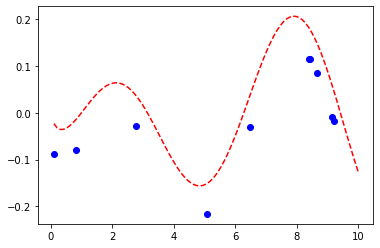

In [86]:
Y = f(X) + np.random.normal(0, 0.1)

x_base = np.linspace(0, 10, 100)
y_base = f(x_base)

plt.plot(X, Y, 'bo', x_base, y_base, 'r--')
plt.show()

In [95]:
for n in range(2,15):
    A = np.vander(X, n)
    theta = LeastSquares(A, Y)
    y_found = np.vander(x_base, n) @ theta
    #plt.plot(X, Y, 'bo', x_base, y_base, 'r--', x_base, y_found, 'b-')
    #plt.show()
    print(np.sqrt(np.sum((Y - A @ theta)**2)))

0.25014771739611935
0.2332127670673883
0.23023252269340164
0.11747259185743758
0.08004325812148674
0.0012313576385720591
0.01219158599531288
0.12072587529439145
0.12149612206822394
0.132236347765968
0.15497779470094852
0.18292795268148504
0.20621820196599477


In [75]:
theta = LeastSquares(A, Y)

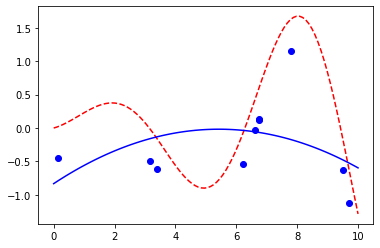

In [79]:
y_found = np.vander(x_base, 3) @ theta
plt.plot(X, Y, 'bo', x_base, y_base, 'r--', x_base, y_found, 'b-')
plt.show()

### Problem 4

Попробуйте решить Задачу 1 (Boston housing dataset), моделируя данные многочленом второй степени:
$$y = \theta_0 + a_1\theta_1 + \ldots+ a_n\theta_n + a_1^2\theta_{11} + a_1a_2\theta_{12}+ \ldots +a_n^2\theta_{nn} = a_0 + \sum_{i=1}^{n}a_i\theta_i + \sum_{i=1}^{n}\sum_{j=1}^{n}a_ia_j\theta_{ij}$$ 